In [102]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import math

In [103]:
raw_data = pd.read_excel("adoptionseries2_with_noise.xlsx")

In [104]:
raw_data['A(t)'] = 0
raw_data['A(t)^2'] = 0

In [105]:
l = raw_data.shape[0]
for i in range(1,l):
    raw_data.iloc[i,2] =raw_data.iloc[i-1,2] + raw_data.iloc[i-1,1]
    raw_data.iloc[i,3] =(raw_data.iloc[i,2])**2

In [106]:
X = raw_data.iloc[:,2:4]
Y = raw_data.iloc[:,1]

In [107]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(X,Y)
# The coefficients
print('Coefficients: \n', regr.coef_)
b = regr.coef_[0]
c = regr.coef_[1]
# The intercept
print('Intercept: \n', regr.intercept_)
a = regr.intercept_

Coefficients: 
 [ 0.21130508 -0.00622291]
Intercept: 
 0.09607195064567414


In [108]:
def calPQM(a,b,c):
   #p,q,m formulas
    p = ((b**2-4*a*c)**0.5 -b)/2
    q = ((b**2-4*a*c)**0.5 +b)/2
    m = (-q)/c
    return [p,q,m]

In [109]:
#Q1.1
pqm = calPQM(a,b,c)
print('p=', pqm[0])
print('q=', pqm[1])
print('m=', pqm[2])

p= 0.0027924053944219235
q= 0.21409748324219813
m= 34.40472892567334


In [110]:
def calN(n,p,q,M):
    N = raw_data.iloc[13,1]
    A = raw_data.iloc[13,2] 
    for i in range(14,n):
        A = A + N
        R = M - A
        F = p + q*(A/M)
        N = F*R
    return N

In [111]:
calN(30,pqm[0],pqm[1],pqm[2])

0.9738414756158628

In [112]:
#Q1.2
from scipy.optimize import curve_fit
def funcNL(x,p,q):
    M=100
    return M*p + (q-p)*x + (-q/M)*(x**2)

In [113]:
popt, pcov = curve_fit(funcNL, raw_data.iloc[:,2], Y)
p = popt[0]
q=popt[1]

print('p=', p)
print('q=', q)

p= 0.0010607266804784799
q= 0.1936843961949751


In [117]:
#Q1.3
N = calN(30,p,q,100)
N

4.484923224999516

In [118]:
#Q1.4
def funcNL4(t,p,q):
    M=100
    expt = np.exp(-p*t-q*t)
    exptn = np.exp(-p*(t-1)-q*(t-1))
    return M*(1-expt)/(1+(q/p)*expt) - M*(1-exptn)/(1+(q/p)*exptn)

In [119]:
popt, pcov = curve_fit(funcNL4, raw_data.iloc[:,0], Y)
p = popt[0]
q=popt[1]
print('p=', p)
print('q=', q)

p= 0.0009554495968537328
q= 0.17857013493183876


In [120]:
funcNL4(30,p,q)

4.504310624290653

In [123]:
# Q2
import matplotlib.pyplot as plt

In [53]:
def calABC(p,q,m):
    a =m*q
    b = q - p
    c = -q/m
    return [a,b,c]


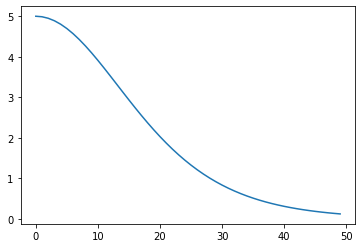

In [57]:
abc = calABC(0.05,0.05,100)
a = abc[0]
b = abc[1]
c = abc[2]
plt.plot(calN(50))

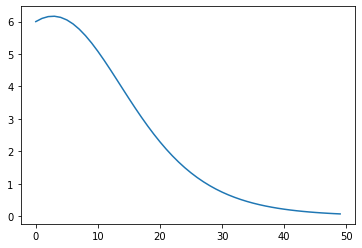

In [58]:
abc = calABC(0.05-0.01,0.05+0.01,100)
a = abc[0]
b = abc[1]
c = abc[2]
plt.plot(calN(50))

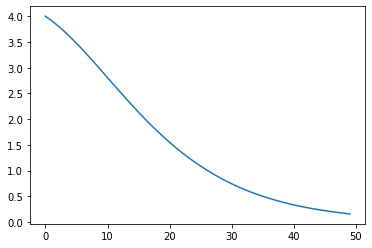

In [59]:
abc = calABC(0.05+0.01,0.05-0.01,100)
a = abc[0]
b = abc[1]
c = abc[2]
plt.plot(calN(50))

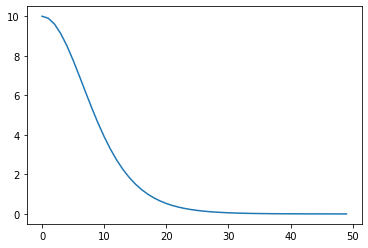

In [60]:
abc = calABC(0.1,0.1,100)
a = abc[0]
b = abc[1]
c = abc[2]
plt.plot(calN(50))

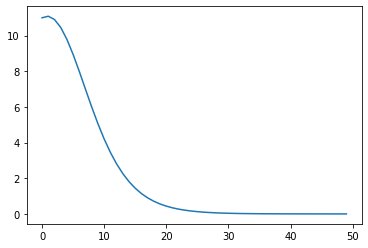

In [61]:
abc = calABC(0.1-0.01,0.1+0.01,100)
a = abc[0]
b = abc[1]
c = abc[2]
plt.plot(calN(50))

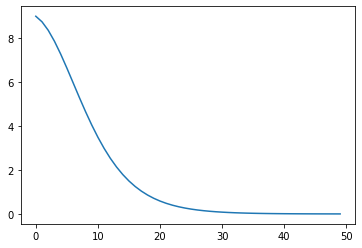

In [62]:
abc = calABC(0.1+0.01,0.1-0.01,100)
a = abc[0]
b = abc[1]
c = abc[2]
plt.plot(calN(50))

In [134]:
#Q4
p_e = np.arange(0,1,0.1)
q_e = np.arange(0,1,0.1)
N = pd.DataFrame(np.zeros((100, 2)))
c =0
a_d = np.array([])
a_c = np.array([])
for p in p_e:
    for q in q_e:
        a_d = np.append(a_d,calN(30,p,q,100))
        a_c = np.append(a_c,funcNL4(30,p,q))
#         N.iloc[c,0] = calN(30,p,q,100)
#         print(calN(30,p,q,100))
#         N.iloc[c,1] = funcNL4(30,p,q)

C:\Users\Apoorva\Documents\AnacondaInstallation\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\Apoorva\Documents\AnacondaInstallation\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


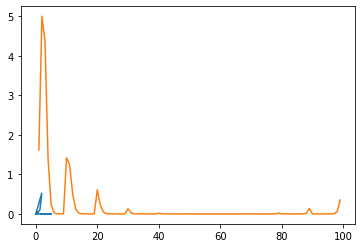

In [138]:


plt.plot(a_d-a_c)